In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
titanic_df=pd.read_csv('train.csv')

In [56]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
titanic_df.shape

(891, 12)

In [58]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
titanic_df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
C104           1
A34            1
B69            1
D46            1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [61]:
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('Q',inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [62]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [63]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [64]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [65]:
titanic_df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

In [66]:
titanic_df['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
D49              1
C30              1
C104             1
B79              1
E38              1
Name: Cabin, Length: 148, dtype: int64

In [67]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [68]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [69]:
titanic_df.groupby(['Sex','Survived'])['Survived'].value_counts()

Sex     Survived  Survived
female  0         0            81
        1         1           233
male    0         0           468
        1         1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

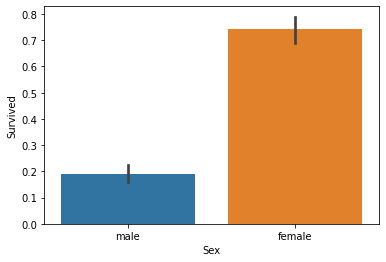

In [70]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le=LabelEncoder()

In [73]:
titanic_df.Sex=le.fit_transform(titanic_df.Sex)

In [74]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [75]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [76]:
titanic_df_oh=pd.get_dummies(titanic_df, columns=['Embarked'])

In [77]:
titanic_df_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(3), uint8(3)
memory usage: 75.8+ KB


In [78]:
titanic_df_oh.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [79]:
features=['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S']

In [80]:
X_train_o=titanic_df_oh[features]
y_train_o=titanic_df_oh.Survived

In [81]:
X_train_o

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,1
888,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [82]:
X_train_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [83]:
y_train_o

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 333 to 703
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Sex         712 non-null    int32  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Embarked_C  712 non-null    uint8  
 7   Embarked_Q  712 non-null    uint8  
 8   Embarked_S  712 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 38.2 KB


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_train_o, y_train_o, \
                                                   test_size=0.2, random_state=11)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [87]:
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()
svc_clf=SVC(kernel='rbf', random_state=0)
lgbm_clf=LGBMClassifier()

In [88]:
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('dt정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('rf정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('lr정확도: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))

svc_clf.fit(X_train, y_train)
svc_pred=svc_clf.predict(X_test)
print('svc정확도:{0: .4f}'.format(accuracy_score(y_test, svc_pred)))

lgbm_clf.fit(X_train, y_train)
lgbm_pred=lgbm_clf.predict(X_test)
print('lgbm정확도:{0:.4f}'.format(accuracy_score(y_test,lgbm_pred)))


dt정확도:  0.8045
rf정확도:  0.8436
lr정확도:  0.8603
svc정확도: 0.7207


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lgbm정확도:0.8771


In [89]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
          'C':[0.01, 0.1, 1, 5, 10]}
grid_lr=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_lr.fit=(X_train_o,y_train_o)
print('최적 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_lr.best_params_, grid_lr.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [43]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lr_clf, X_train_o, y_train_o, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1: .4f}" .format(iter_count,accuracy))
    
print("평균 정확도:{0: .4f}" .format(np.mean(scores)))

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

교차검증 0 정확도 :  0.7765
교차검증 1 정확도 :  0.7978
교차검증 2 정확도 :  0.7865
교차검증 3 정확도 :  0.7697
교차검증 4 정확도 :  0.8202
평균 정확도: 0.7901


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_train_o, y_train_o, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1: .4f}" .format(iter_count,accuracy))
    
print("평균 정확도:{0: .4f}" .format(np.mean(scores)))

교차검증 0 정확도 :  0.7374
교차검증 1 정확도 :  0.7584
교차검증 2 정확도 :  0.8090
교차검증 3 정확도 :  0.7416
교차검증 4 정확도 :  0.8202
평균 정확도: 0.7733


In [45]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(rf_clf, X_train_o, y_train_o, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1: .4f}" .format(iter_count,accuracy))
    
print("평균 정확도:{0: .4f}" .format(np.mean(scores)))

교차검증 0 정확도 :  0.7933
교차검증 1 정확도 :  0.8034
교차검증 2 정확도 :  0.8483
교차검증 3 정확도 :  0.7809
교차검증 4 정확도 :  0.8371
평균 정확도: 0.8126


In [46]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lgbm_clf, X_train_o, y_train_o, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1: .4f}" .format(iter_count,accuracy))
    
print("평균 정확도:{0: .4f}" .format(np.mean(scores)))

교차검증 0 정확도 :  0.7989
교차검증 1 정확도 :  0.8146
교차검증 2 정확도 :  0.8708
교차검증 3 정확도 :  0.7921
교차검증 4 정확도 :  0.8539
평균 정확도: 0.8261


In [47]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_rclf=GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_rclf.fit(X_train_o, y_train_o)

print('최적 파라미터:', grid_rclf.best_params_)
print('최고정확도:{0:.4f}'. format(grid_rclf.best_score_))
best_rclf= grid_rclf.best_estimator_

최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
최고정확도:0.8339


In [48]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[25, 30]}

grid_lgbm=GridSearchCV(lgbm_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_lgbm.fit(X_train_o, y_train_o)

print('최적 파라미터:', grid_lgbm.best_params_)
print('최고정확도:{0:.4f}'. format(grid_lgbm.best_score_))
best_lgbm= grid_lgbm.best_estimator_

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warnin

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=25. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[LightGBM] [Warnin

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf

In [46]:
test_r=pd.read_csv('test.csv')

In [47]:
test_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
test_r.shape

(418, 11)

In [49]:
test_r_oh=pd.get_dummies(test_r, columns=['Embarked'])

In [50]:
test_r_oh.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [51]:
X_test_r=test_r_oh[features]

In [52]:
X_test_r.Sex=le.fit_transform(X_test_r.Sex)

C:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
X_test_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 19.3 KB


In [54]:
X_test_r.Age.fillna(X_test_r.Age.mean(), inplace=True)
X_test_r.Fare.fillna(X_test_r.Fare.mean(), inplace=True)

C:\anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [55]:
X_test_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 19.3 KB


In [56]:
pred_lr=best_rclf.predict(X_test_r)

In [57]:
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")

In [58]:
submission.Survived=pred_lr

In [59]:
submission.to_csv("lr_predict_bhs.csv")